## Word2Vec알고리즘 (CBOW)
- 내부의 Weight가 업데이트 되는 과정을 자세하게 살펴보는 코드

"You say goodbye and I say hello."

In [1]:
import numpy as np
# 입력값은 원-핫 벡터형태를 가짐 
input1 = np.array([[1, 0, 0, 0, 0, 0, 0]]) # You

input2 = np.array([[0, 0, 1, 0, 0, 0, 0]]) # goodbye

In [2]:
# (입력 x 차원의 크기) - 차원의 크기는 사용자가 선정 
## 초기의 Weight는 랜덤하게 결정됨 
W_in = np.random.randn(7, 3)

In [3]:
h_1 = np.matmul(input1, W_in) # 은닉층의 값 
h_2 = np.matmul(input2, W_in) # 은닉층의 값 

In [5]:
h = (h_1+h_2)/2
print(h)

[[0.20274156 0.10486586 0.34333331]]


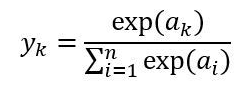

In [29]:
W_out = np.random.randn(3, 7)
score = np.matmul(h, W_out)
print(np.round(score, 4))

[[ 0.4879 -0.508   0.1455 -0.4045 -0.0041 -0.559   0.5599]]


In [16]:
def softmax(x): 
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [28]:
pred = softmax(score)
print(np.round(pred, 4))

[[0.174  0.1222 0.0988 0.1765 0.2168 0.1134 0.0982]]


In [30]:
# Cross Entropy Loss 계산 
def cross_entropy_error(y, t):
    '''
    y : prediction 
    t : target 
    '''
    delta = 1e-7 # log의 내부가 0이 되는 것을 방지 
    
    # y.shape[0]으로 나눠주는 이유는 배치 사이즈 반영 
    return -np.sum(t * np.log(y + delta)) / y.shape[0]

In [31]:
cross_entropy_error(pred, [0, 1, 0, 0, 0, 0, 0])

2.101924544240407

In [42]:
# Loss를 통해서 Weight를 업데이트 
# Softmax의 미분값 
ans = [0, 1, 0, 0, 0, 0, 0]
ds = np.round(pred - ans, 4)
print(ds)

[[ 0.174  -0.8778  0.0988  0.1765  0.2168  0.1134  0.0982]]


In [51]:
# ds (Delta for W_out) 계산 
dW_out = np.outer(h, ds)
print(np.round(dW_out, 4))

[[ 0.0353 -0.178   0.02    0.0358  0.044   0.023   0.0199]
 [ 0.0182 -0.0921  0.0104  0.0185  0.0227  0.0119  0.0103]
 [ 0.0597 -0.3014  0.0339  0.0606  0.0744  0.0389  0.0337]]


In [52]:
da = np.dot(ds, W_out.T)
print(np.round(da, 4))

[[-0.3732  1.0494  1.2529]]


In [56]:
dw_1 = np.round(np.outer(np.array([[1,0,0,0,0,0,0]]), (da/2)), 4)
print(dw_1)

[[-0.1866  0.5247  0.6264]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]]


In [57]:
dw_2 = np.round(np.outer(np.array([[0,0,1,0,0,0,0]]), (da/2)), 4)
print(dw_2)

[[-0.      0.      0.    ]
 [-0.      0.      0.    ]
 [-0.1866  0.5247  0.6264]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]
 [-0.      0.      0.    ]]


In [73]:
learning_rate = 1
W_in_new = W_in - learning_rate * dw_1
W_in_new = W_in_new - learning_rate * dw_2
print(np.round(W_in_new, 4))

[[ 0.475  -0.3731 -0.4883]
 [-0.0261  1.4564  0.5001]
 [ 0.3037 -0.4666 -0.0778]
 [-1.0541  0.1681  0.4108]
 [-0.9173  0.6615  0.383 ]
 [-0.1627 -0.2639 -0.3442]
 [ 0.6816 -0.3252 -0.8528]]


In [74]:
print(np.round(W_in, 4))

[[ 0.2884  0.1516  0.1381]
 [-0.0261  1.4564  0.5001]
 [ 0.1171  0.0581  0.5486]
 [-1.0541  0.1681  0.4108]
 [-0.9173  0.6615  0.383 ]
 [-0.1627 -0.2639 -0.3442]
 [ 0.6816 -0.3252 -0.8528]]


In [70]:
learnoutg_rate = 1
W_out_new = W_out - learnoutg_rate * dW_out
print(np.round(W_out_new, 4))

[[-0.3421 -0.1997  1.786  -3.0867 -1.1163 -0.3515 -0.2393]
 [ 0.7465 -0.1937  0.3428  1.775   0.6387  0.3337  1.3281]
 [ 1.309  -0.868  -0.7845  0.015   0.3448 -1.5788  1.3178]]


In [72]:
print(np.round(dW_out, 4))

[[ 0.0353 -0.178   0.02    0.0358  0.044   0.023   0.0199]
 [ 0.0182 -0.0921  0.0104  0.0185  0.0227  0.0119  0.0103]
 [ 0.0597 -0.3014  0.0339  0.0606  0.0744  0.0389  0.0337]]


## Word2Vec알고리즘 (Skip-Gram)

In [75]:
import numpy as np
# 입력값은 원-핫 벡터형태를 가짐 
input = np.array([[0, 1, 0, 0, 0, 0, 0]]) # say

output1 = np.array([[1, 0, 0, 0, 0, 0, 0]]) # you
output2 = np.array([[0, 0, 1, 0, 0, 0, 0]]) # you

In [76]:
# (입력 x 차원의 크기) - 차원의 크기는 사용자가 선정 
## 초기의 Weight는 랜덤하게 결정됨 
W_in = np.random.randn(7, 3)

In [77]:
h = np.matmul(input, W_in) # 은닉층의 값 

In [78]:
print(h)

[[ 1.73019885  0.25404839 -1.17196824]]


In [79]:
W_out = np.random.randn(3, 7)
score = np.matmul(h, W_out)
print(np.round(score, 4))

[[ 2.7048  0.3958  4.2091 -0.5001  0.1066  0.2814  3.8254]]


In [80]:
pred = softmax(score)
print(np.round(pred, 4))

[[0.1127 0.0112 0.5074 0.0046 0.0084 0.01   0.3457]]


In [83]:
loss1 = cross_entropy_error(pred, [1, 0, 0, 0, 0, 0, 0])
loss2 = cross_entropy_error(pred, [0, 0, 1, 0, 0, 0, 0])

In [85]:
print(np.round(loss1, 4), np.round(loss2, 4))

2.1828 0.6785


In [87]:
ds1 = np.round(pred - output1, 4)
ds2 = np.round(pred - output2, 4)
ds = ds1 + ds2
print(ds)

[[-0.7746  0.0224  0.0148  0.0092  0.0168  0.02    0.6914]]


In [90]:
dw_out = np.round(np.outer(h, ds), 4)
print(dw_out)

[[-1.3402  0.0388  0.0256  0.0159  0.0291  0.0346  1.1963]
 [-0.1968  0.0057  0.0038  0.0023  0.0043  0.0051  0.1756]
 [ 0.9078 -0.0263 -0.0173 -0.0108 -0.0197 -0.0234 -0.8103]]


In [91]:
da = np.dot(ds, W_out.T)
print(np.round(da, 4))

[[ 0.8017 -0.4194  0.5604]]


In [92]:
dw_in = np.outer(np.array([[0,1,0,0,0,0,0]]), da)
print(np.round(dw_in, 4))

[[ 0.     -0.      0.    ]
 [ 0.8017 -0.4194  0.5604]
 [ 0.     -0.      0.    ]
 [ 0.     -0.      0.    ]
 [ 0.     -0.      0.    ]
 [ 0.     -0.      0.    ]
 [ 0.     -0.      0.    ]]


In [93]:
learning_rate = 1
W_in_new = W_in - learning_rate * dw_in
print(np.round(W_in_new, 4))

[[ 0.1781 -0.5404 -0.0841]
 [ 0.9285  0.6734 -1.7324]
 [ 0.62    0.4294  0.487 ]
 [ 0.6782  0.1089  0.4805]
 [ 1.4623  1.6662  1.0456]
 [-0.31   -0.4486  0.2929]
 [-0.5184 -1.7401 -1.5444]]


In [96]:
print(np.round(W_in, 4))

[[ 0.1781 -0.5404 -0.0841]
 [ 1.7302  0.254  -1.172 ]
 [ 0.62    0.4294  0.487 ]
 [ 0.6782  0.1089  0.4805]
 [ 1.4623  1.6662  1.0456]
 [-0.31   -0.4486  0.2929]
 [-0.5184 -1.7401 -1.5444]]


In [94]:
learnoutg_rate = 1
W_out_new = W_out - learnoutg_rate * dw_out
print(np.round(W_out_new, 4))

[[ 1.4883 -0.3828  1.4322 -0.4885 -0.7947  0.7718  0.1107]
 [-0.1291  0.8108  0.7099 -1.3601 -0.5432 -1.6817 -1.1093]
 [-3.0677 -0.6423 -1.2672 -0.5546 -1.3183  0.6103 -0.7267]]


In [95]:
print(np.round(W_out, 4))

[[ 0.1481 -0.344   1.4578 -0.4726 -0.7656  0.8064  1.307 ]
 [-0.3259  0.8165  0.7137 -1.3578 -0.5389 -1.6766 -0.9337]
 [-2.1599 -0.6686 -1.2845 -0.5654 -1.338   0.5869 -1.537 ]]
